# A1: Predicting Car Price

In this assignment, We need to predict the **selling price for a car** . Finally we also need to prepare a simple web-based car selling price prediction system for deployment.

## The provide raw data contains following features- 

- **name** : Brand name of the Car
- **Year** : Year of the car made
- **selling_price**: Selling price of the car
- **km_driven**: How many Killometers A car already run
- **fuel**: Type of fuel is used in car
- **seller_type**: Type of seller (Invididual, Dealer etc)
- **transmission**: Type of transmission of car ( Manual, Automatic)
- **owner**: How many owner already did purchase of a car
- **mileage**: Mileage of the car
- **engine**: Engine size
- **max_power**: The max power is available to a car
- **torque**:if an engine has a lot of torque, the car can accelerate more quickly.
- **seats**: Number of seats are availabe to a car

This raw dataset is required to be processed on given preporessing conditions


## Importing libraries

In [26]:
#loading the required libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot_lib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [27]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.25.2', '1.5.3', '0.12.2', '3.7.2')

In [28]:
sklearn.__version__

'1.2.2'

## 1. Load data

In [29]:
# Use pd.read_csv function to show our Dataset and load it into a dataframe 'data_frame'
data_frame = pd.read_csv('data/Cars.csv')

# Check for missing values in the data
data_frame.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [30]:
# head() function to display the first few rows of a DataFrame. 
data_frame.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [31]:
# Get the dimensions of the DataFrame 'data_frame' using the shape attribute
data_frame.shape

(8128, 13)

It returns a tuple representing the number of rows and columns which means the dataset has 8128 rows and 13 columns


In [32]:
# Descriptive statistics of the DataFrame using the describe() function
data_frame.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [33]:
# .info() function to display information about the DataFrame, including data types and memory usage
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [34]:
# Get the unique values and the number of unique value in the 'owner' column of the DataFrame
u1 = data_frame['owner'].unique()

u2 = data_frame['owner'].nunique()
print(u1 , u2)

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] 5


In [35]:
# For the feature owner, map First owner to 1, ..., Test Drive Car to 5
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
# We will use .map() function  transform values in the owner column
data_frame["owner"] = data_frame["owner"].map(dict_owner)
data_frame.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,1,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [36]:
# Unique values in the 'fuel' column of the 'data_frame'
data_frame['fuel'].unique(), data_frame.shape

(array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object), (8128, 13))

In [37]:
# Drop rows where 'fuel' column contains 'CNG' or 'LPG'
data_frame = data_frame.drop(data_frame[data_frame['fuel'].isin(['CNG', 'LPG'])].index)


In [38]:
# Verify if the CNG And LPG got removed
data_frame['fuel'].unique(), data_frame.shape

(array(['Diesel', 'Petrol'], dtype=object), (8033, 13))

In [39]:
# Drop feature torque since Chaky's company cannot understand it.
data_frame.drop(['torque'], axis = 1, inplace = True)

# For the feature brand, take only the first word and remove the rest
# Use str.split() function
data_frame["brand"] = data_frame["name"].str.split(" ").str[0]
data_frame.drop(["name"], axis=1, inplace=True)

# Split features of mileage, engine and max power into value and unit
data_frame[["mileage_value","mileage_unit"]] = data_frame["mileage"].str.split(pat=' ', expand = True)
data_frame[["engine_value","engine_unit"]] = data_frame["engine"].str.split(pat=' ', expand = True)
data_frame[["max_power_value","max_power_unit"]] = data_frame["max_power"].str.split(pat=' ', expand = True)
data_frame.drop(["mileage","engine","max_power"], axis=1, inplace=True)
data_frame.head(20)

# We will convert the values of mileage, engine and max_power into float
data_frame[["mileage","engine","max_power"]] = data_frame[["mileage_value","engine_value","max_power_value"]].astype('float64')
data_frame.drop(["mileage_value","engine_value","max_power_value",
        "mileage_unit","engine_unit","max_power_unit"], axis=1, inplace = True)

# Arrange the columns
data_frame = data_frame.reindex(columns = ['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

data_frame

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [40]:
#  Drop rows where the 'owner' column contains the value 5 (Test Drive Car)
data_frame = data_frame.drop(data_frame[data_frame['owner'].isin([5])].index)

In [41]:
# Check categories of brand, fuel, seller type and owner
print("categories of brand are", data_frame["brand"].unique())
print("categories of fuel are", data_frame["fuel"].unique())
print("categories of seller_type are", data_frame["seller_type"].unique())
print("categories of owner are", data_frame["owner"].unique())

categories of brand are ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
categories of fuel are ['Diesel' 'Petrol']
categories of seller_type are ['Individual' 'Dealer' 'Trustmark Dealer']
categories of owner are [1 2 3 4]


__Now Our data looks like that it satisies all the given requirements__

In [42]:
data_frame.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [43]:
# Apply log transform to the 'selling_price' and 'km_driven' column
data_frame['selling_price'] = np.log(data_frame['selling_price']) 
data_frame['km_driven'] = np.log(data_frame['km_driven']) 

In [44]:
data_frame.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,11.887931,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,11.695247,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,11.849398,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,11.751942,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,11.695247,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [45]:
# Copy the data_frame for further data processing & feature transformation
data_frame_cp = data_frame.copy()

In [46]:
data_frame_cp.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,11.887931,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,11.695247,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,11.849398,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,11.751942,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,11.695247,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [47]:
# Define the percentiles to create four classes
percentiles = [0, 0.25, 0.5, 0.75, 1]

# Calculate the corresponding cutoff values
cutoffs = data_frame_cp['selling_price'].quantile(percentiles)

# Create labels for the four classes (0, 1, 2, 3)
labels = [0, 1, 2, 3]

# Use pd.cut to create the discrete variable
data_frame_cp['price_category'] = pd.cut(data_frame_cp['selling_price'], bins=cutoffs, labels=labels, include_lowest=True)

# Inspect the result
print(data_frame_cp[['selling_price', 'price_category']])

      selling_price price_category
0         13.017003              1
1         12.821258              1
2         11.970350              0
3         12.323856              0
4         11.775290              0
...             ...            ...
8123      12.676076              1
8124      11.813030              0
8125      12.853176              1
8126      12.577636              1
8127      12.577636              1

[8028 rows x 2 columns]


In [48]:
data_frame_cp.drop('selling_price', axis=1, inplace=True)

In [49]:
data_frame_cp

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_category
0,Maruti,2014,11.887931,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,1
1,Skoda,2014,11.695247,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,1
2,Honda,2006,11.849398,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,0
3,Hyundai,2010,11.751942,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,0
4,Maruti,2007,11.695247,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,11.608236,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0,1
8124,Hyundai,2007,11.686879,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0,0
8125,Maruti,2009,11.695247,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0,1
8126,Tata,2013,10.126631,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0,1


## 2. EDA 

### EDA is an essential step to inspect the data, so to better understand nature of the given data.

In [51]:
data_frame_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   brand           8028 non-null   object  
 1   year            8028 non-null   int64   
 2   km_driven       8028 non-null   float64 
 3   fuel            8028 non-null   object  
 4   seller_type     8028 non-null   object  
 5   transmission    8028 non-null   object  
 6   owner           8028 non-null   int64   
 7   mileage         7814 non-null   float64 
 8   engine          7814 non-null   float64 
 9   max_power       7820 non-null   float64 
 10  seats           7814 non-null   float64 
 11  price_category  8028 non-null   category
dtypes: category(1), float64(5), int64(2), object(4)
memory usage: 760.7+ KB


### 2.1. Univariate analyis

Single variable exploratory data anlaysis

In [59]:
data_frame_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            8028 non-null   int64   
 1   km_driven       8028 non-null   float64 
 2   fuel            8028 non-null   object  
 3   seller_type     8028 non-null   object  
 4   transmission    8028 non-null   object  
 5   owner           8028 non-null   int64   
 6   mileage         7814 non-null   float64 
 7   engine          7814 non-null   float64 
 8   max_power       7820 non-null   float64 
 9   seats           7814 non-null   float64 
 10  price_category  8028 non-null   category
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 697.9+ KB


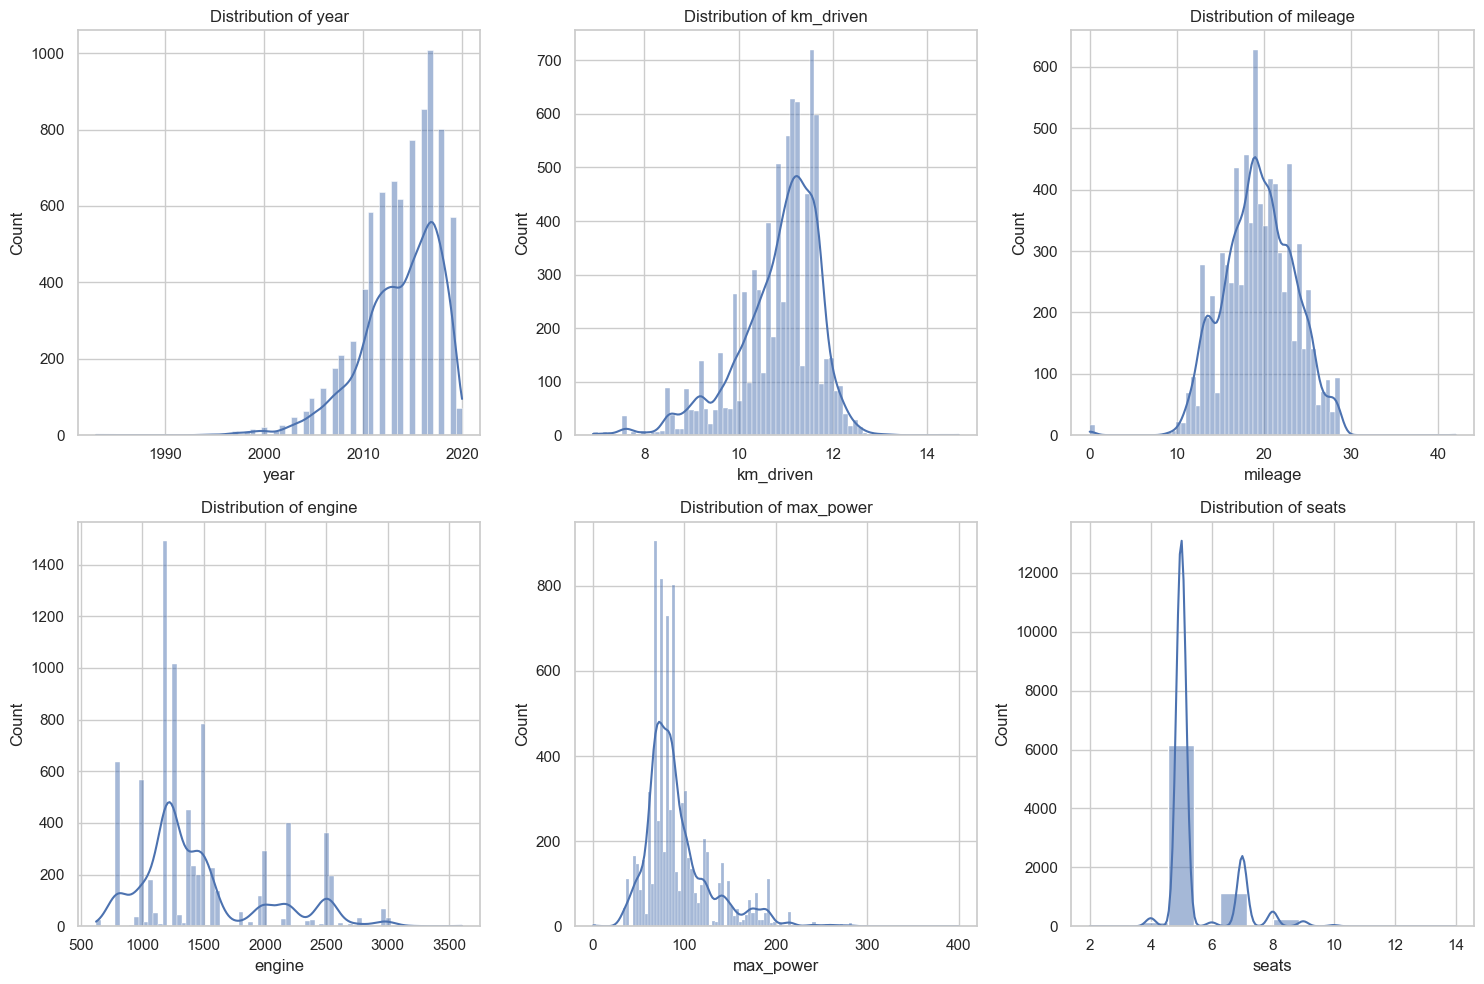

In [60]:
# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Univariate Analysis: Distribution of numerical features
numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
plt.figure(figsize=(15, 10))
for i in range(len(numerical_features)):
    plt.subplot(2, 3, i+1)
    sns.histplot(data_frame_cp[numerical_features[i]], kde=True)
    plt.title(f'Distribution of {numerical_features[i]}')
plt.tight_layout()
plt.show()

Year: The histogram for 'year' shows that most cars in the dataset are relatively new, with a peak in the number of cars around recent years.

Km Driven: The distribution for 'km_driven' is right-skewed, meaning most cars have a lower km driven count, with fewer cars having driven a large number of kilometers.

Mileage: The 'mileage' histogram is also right-skewed, with most cars having higher mileage values and a few cars with extremely high or low mileage.

Engine: The 'engine' size histogram shows that a majority of cars have engines in the mid-range of the spectrum, with fewer cars having very small or very large engines.

Max Power: The 'max_power' histogram shows a peak at lower power values, suggesting that most cars in the dataset are not high-performance vehicles.

Seats: The 'seats' histogram shows that most cars have 5 seats, which is typical for standard passenger cars, with fewer cars having more or less than 5 seats.

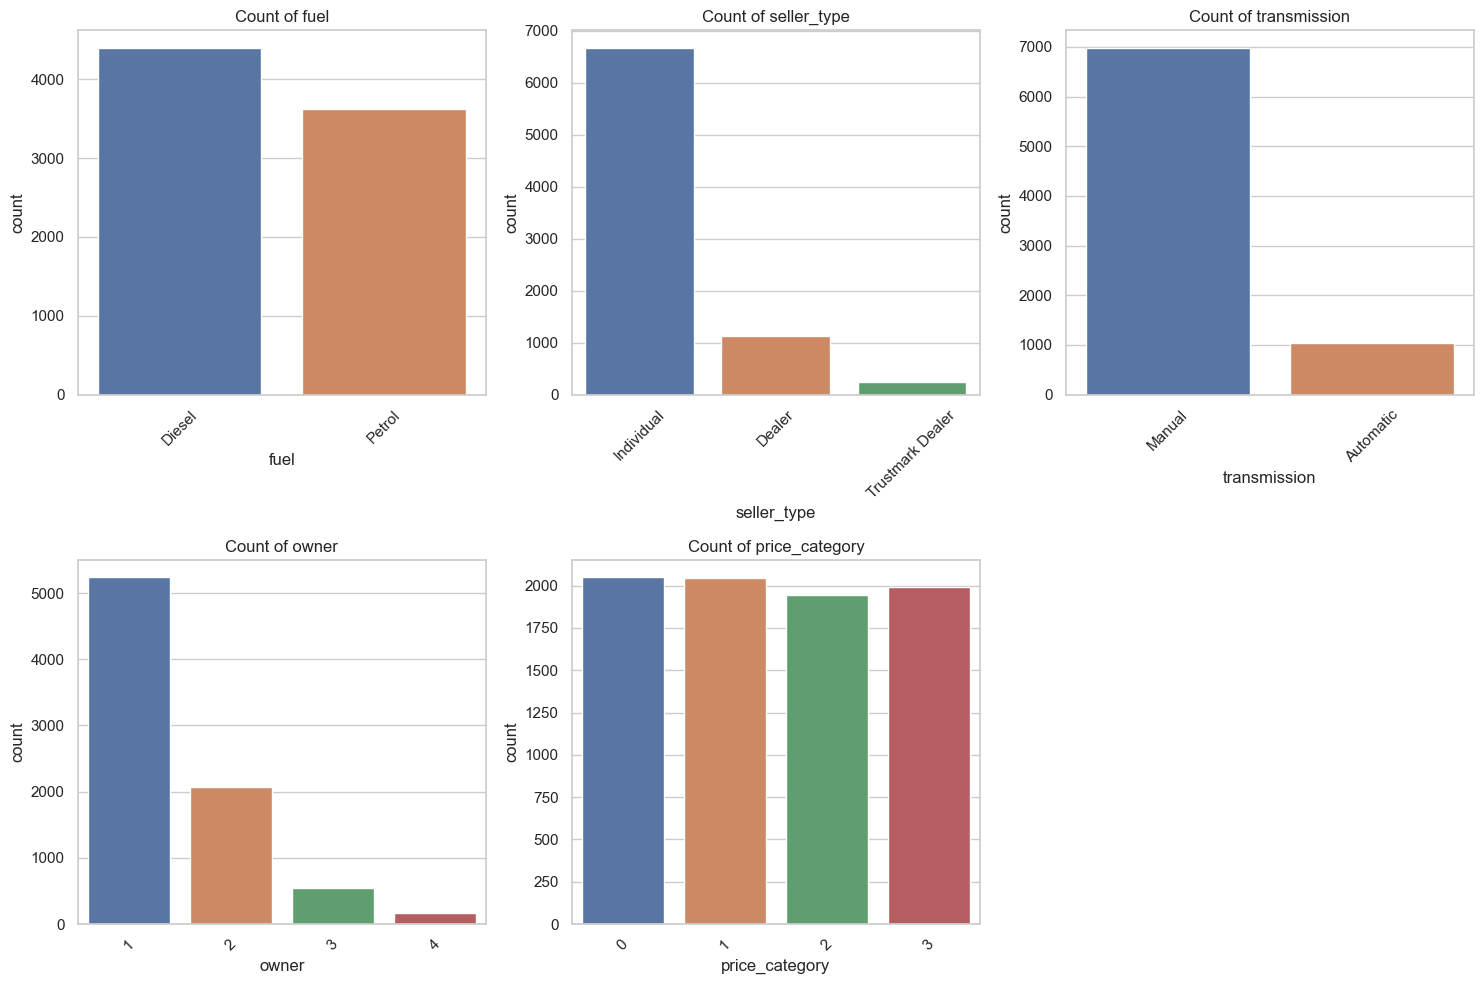

In [61]:

# Categorical Analysis: Count plots for categorical features
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'price_category']
plt.figure(figsize=(15, 10))
for i in range(len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=data_frame_cp[categorical_features[i]])
    plt.title(f'Count of {categorical_features[i]}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Fuel: Diesel cars have a slightly higher count compared to Petrol cars, indicating a small preference or greater availability of Diesel cars in the dataset.

Seller Type: The majority of cars are sold by Individual sellers, with Dealers and Trustmark Dealers having significantly fewer counts. This suggests that the used car market is dominated by private individual sellers.

Transmission: Manual transmission cars greatly outnumber Automatic transmission cars, showing a strong market preference or availability for Manual cars.

Owner: Most of the cars in the dataset are from 'First Owner', followed by 'Second Owner', with 'Third Owner' and 'Fourth & Above Owner' being less common. This indicates that a large portion of the used cars are being sold for the first time.

Price Category: The count is fairly even across the different price categories, indicating a good distribution of cars across various price points in the dataset.

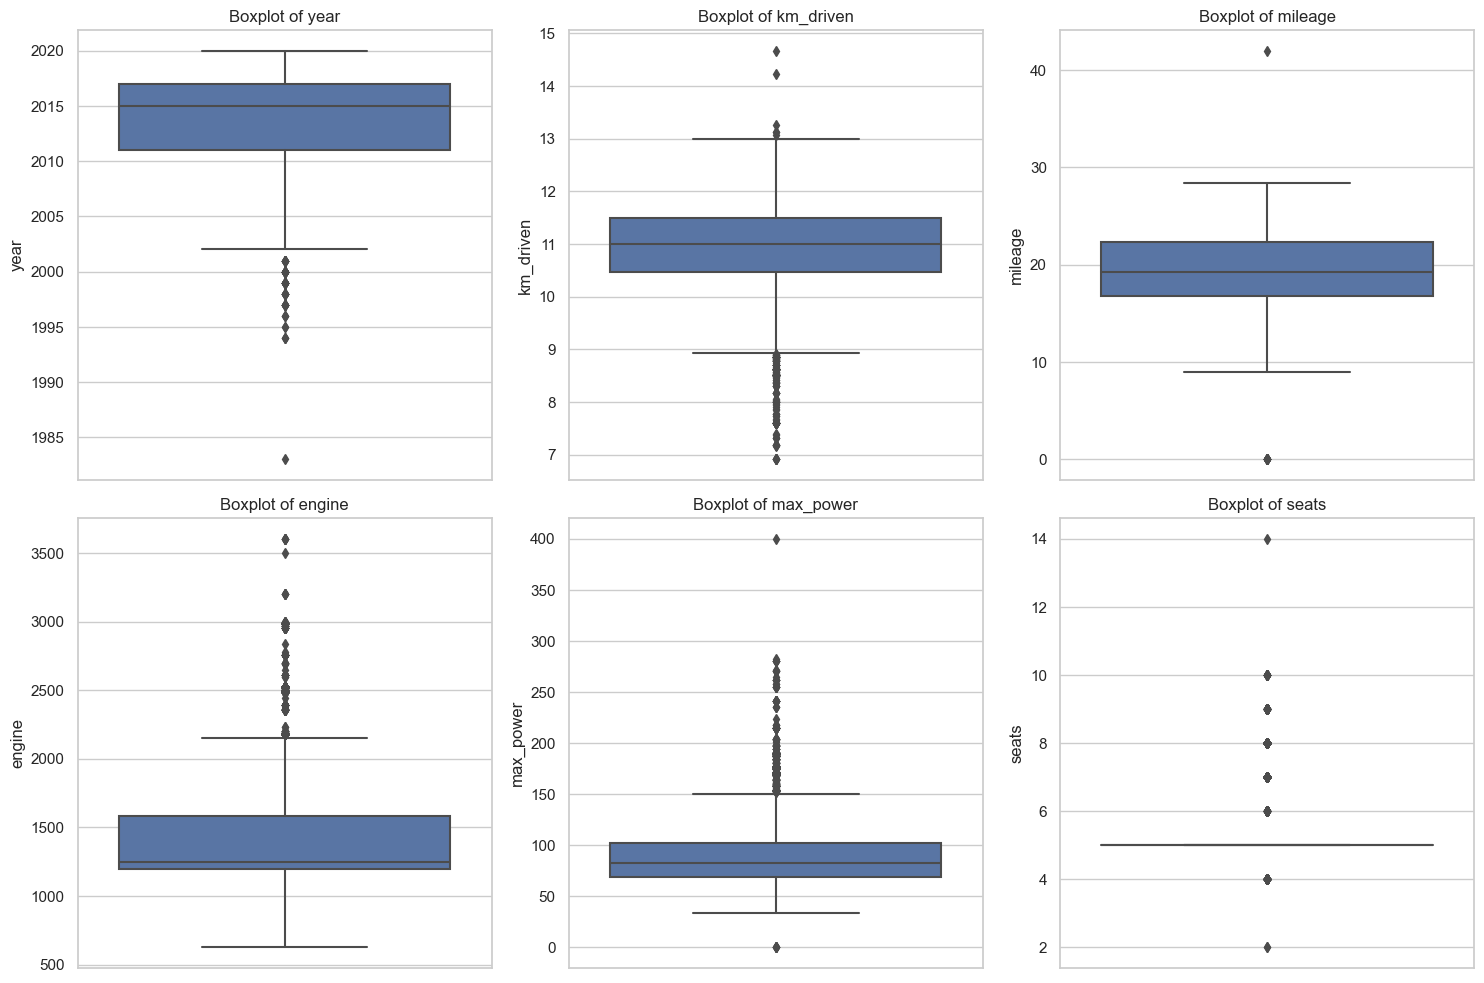

In [62]:
# Boxplot for Numerical Features
plt.figure(figsize=(15, 10))
for i in range(len(numerical_features)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data_frame_cp[numerical_features[i]])
    plt.title(f'Boxplot of {numerical_features[i]}')
plt.tight_layout()
plt.show()

Year: The boxplot for the 'year' feature likely shows a concentration of cars from certain production years, with a few older models as outliers. This indicates the majority of the cars in the dataset are relatively newer models.

Km Driven: This boxplot helps in understanding the range of kilometers driven across different cars. A spread with high outliers can indicate some cars have been driven much more than others.

Mileage: The boxplot for mileage shows the variation in fuel efficiency across different cars. Outliers may represent exceptionally high or low mileage cars.

Engine: The size of the engine (in cc) will also vary, as seen in its boxplot. Larger outliers might indicate vehicles with unusually large engines.

Max Power: Similar to the engine, this boxplot shows the spread of the car's power. High power outliers might be indicative of performance vehicles.

Seats: The plot shows most cars have a standard number of seats, with a few exceptions.

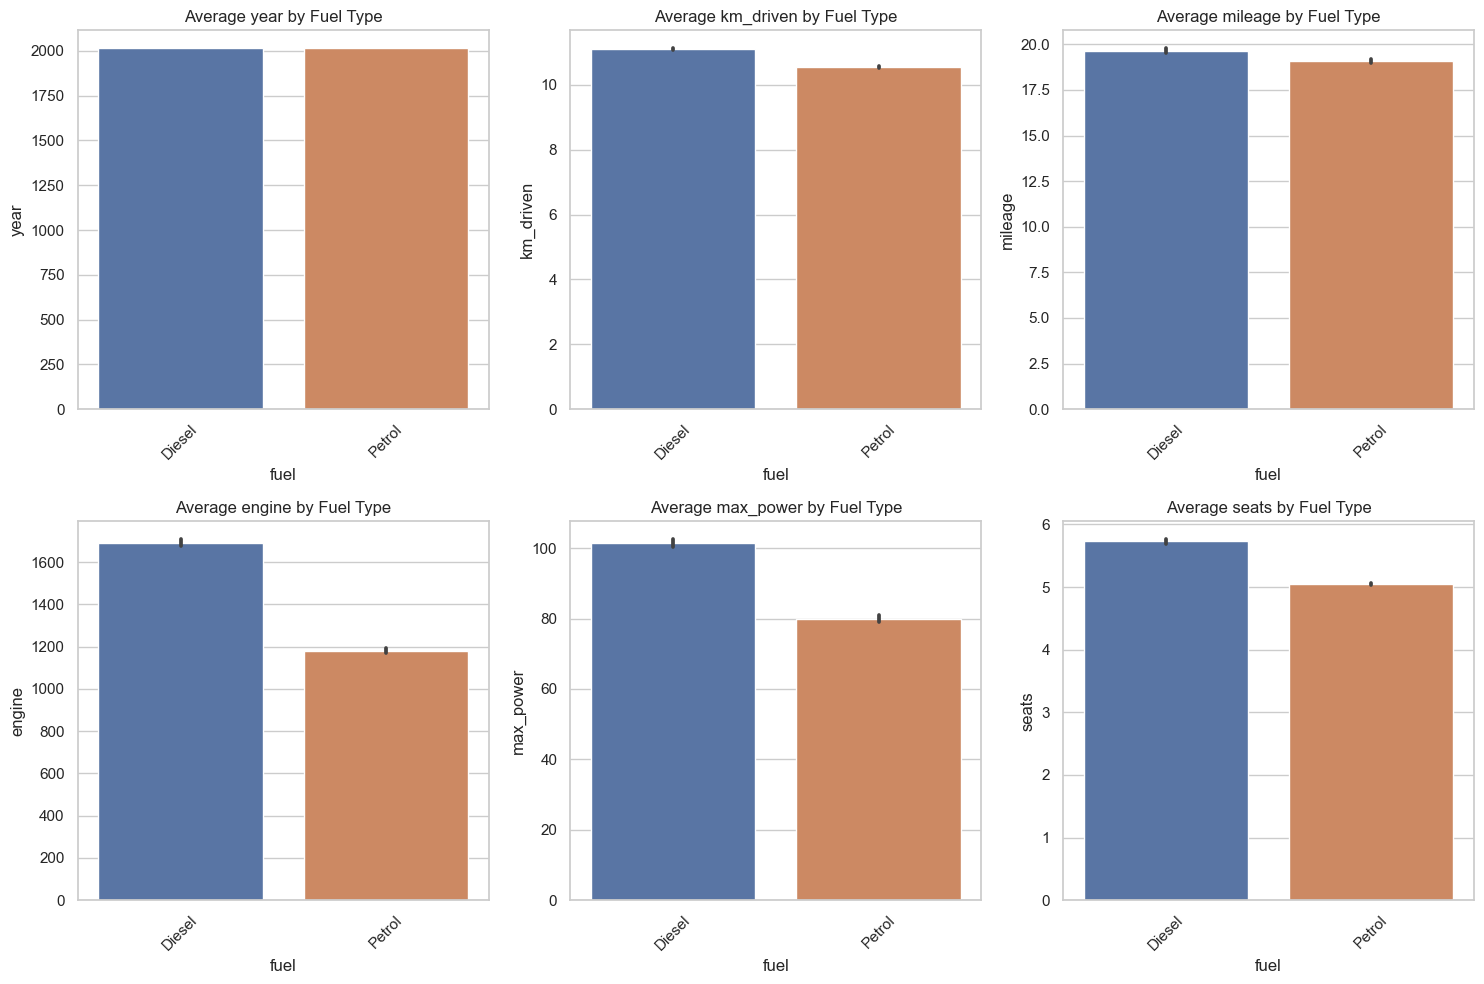

In [63]:
# Bar plot for average values of numerical features for each fuel type
plt.figure(figsize=(15, 10))
for i in range(len(numerical_features)):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='fuel', y=numerical_features[i], data=data_frame_cp)
    plt.title(f'Average {numerical_features[i]} by Fuel Type')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"The 'Year' column represents the model year of each car. We can substitute this with an 'age' attribute for the cars. To calculate each car's age, we'll use a reference point set at one year beyond the most recent model year in the data."

In [65]:
# Find the maximum model year in the dataset
max_year = data_frame_cp['year'].max()

# Calculate the age of each car. The origin is set at 1 year older than the latest model year.
data_frame_cp['age'] = (max_year + 1) - data_frame['year']

# remove the original 'year' column:
data_frame_cp.drop('year', axis=1, inplace=True)


In [66]:
# Define the numerical columns to visualize other than 'year'
numerical_cols = ['age', 'km_driven', 'owner','mileage','engine', 'seats','max_power', 'price_category']

## Multivariate Analysis

### Pairplot

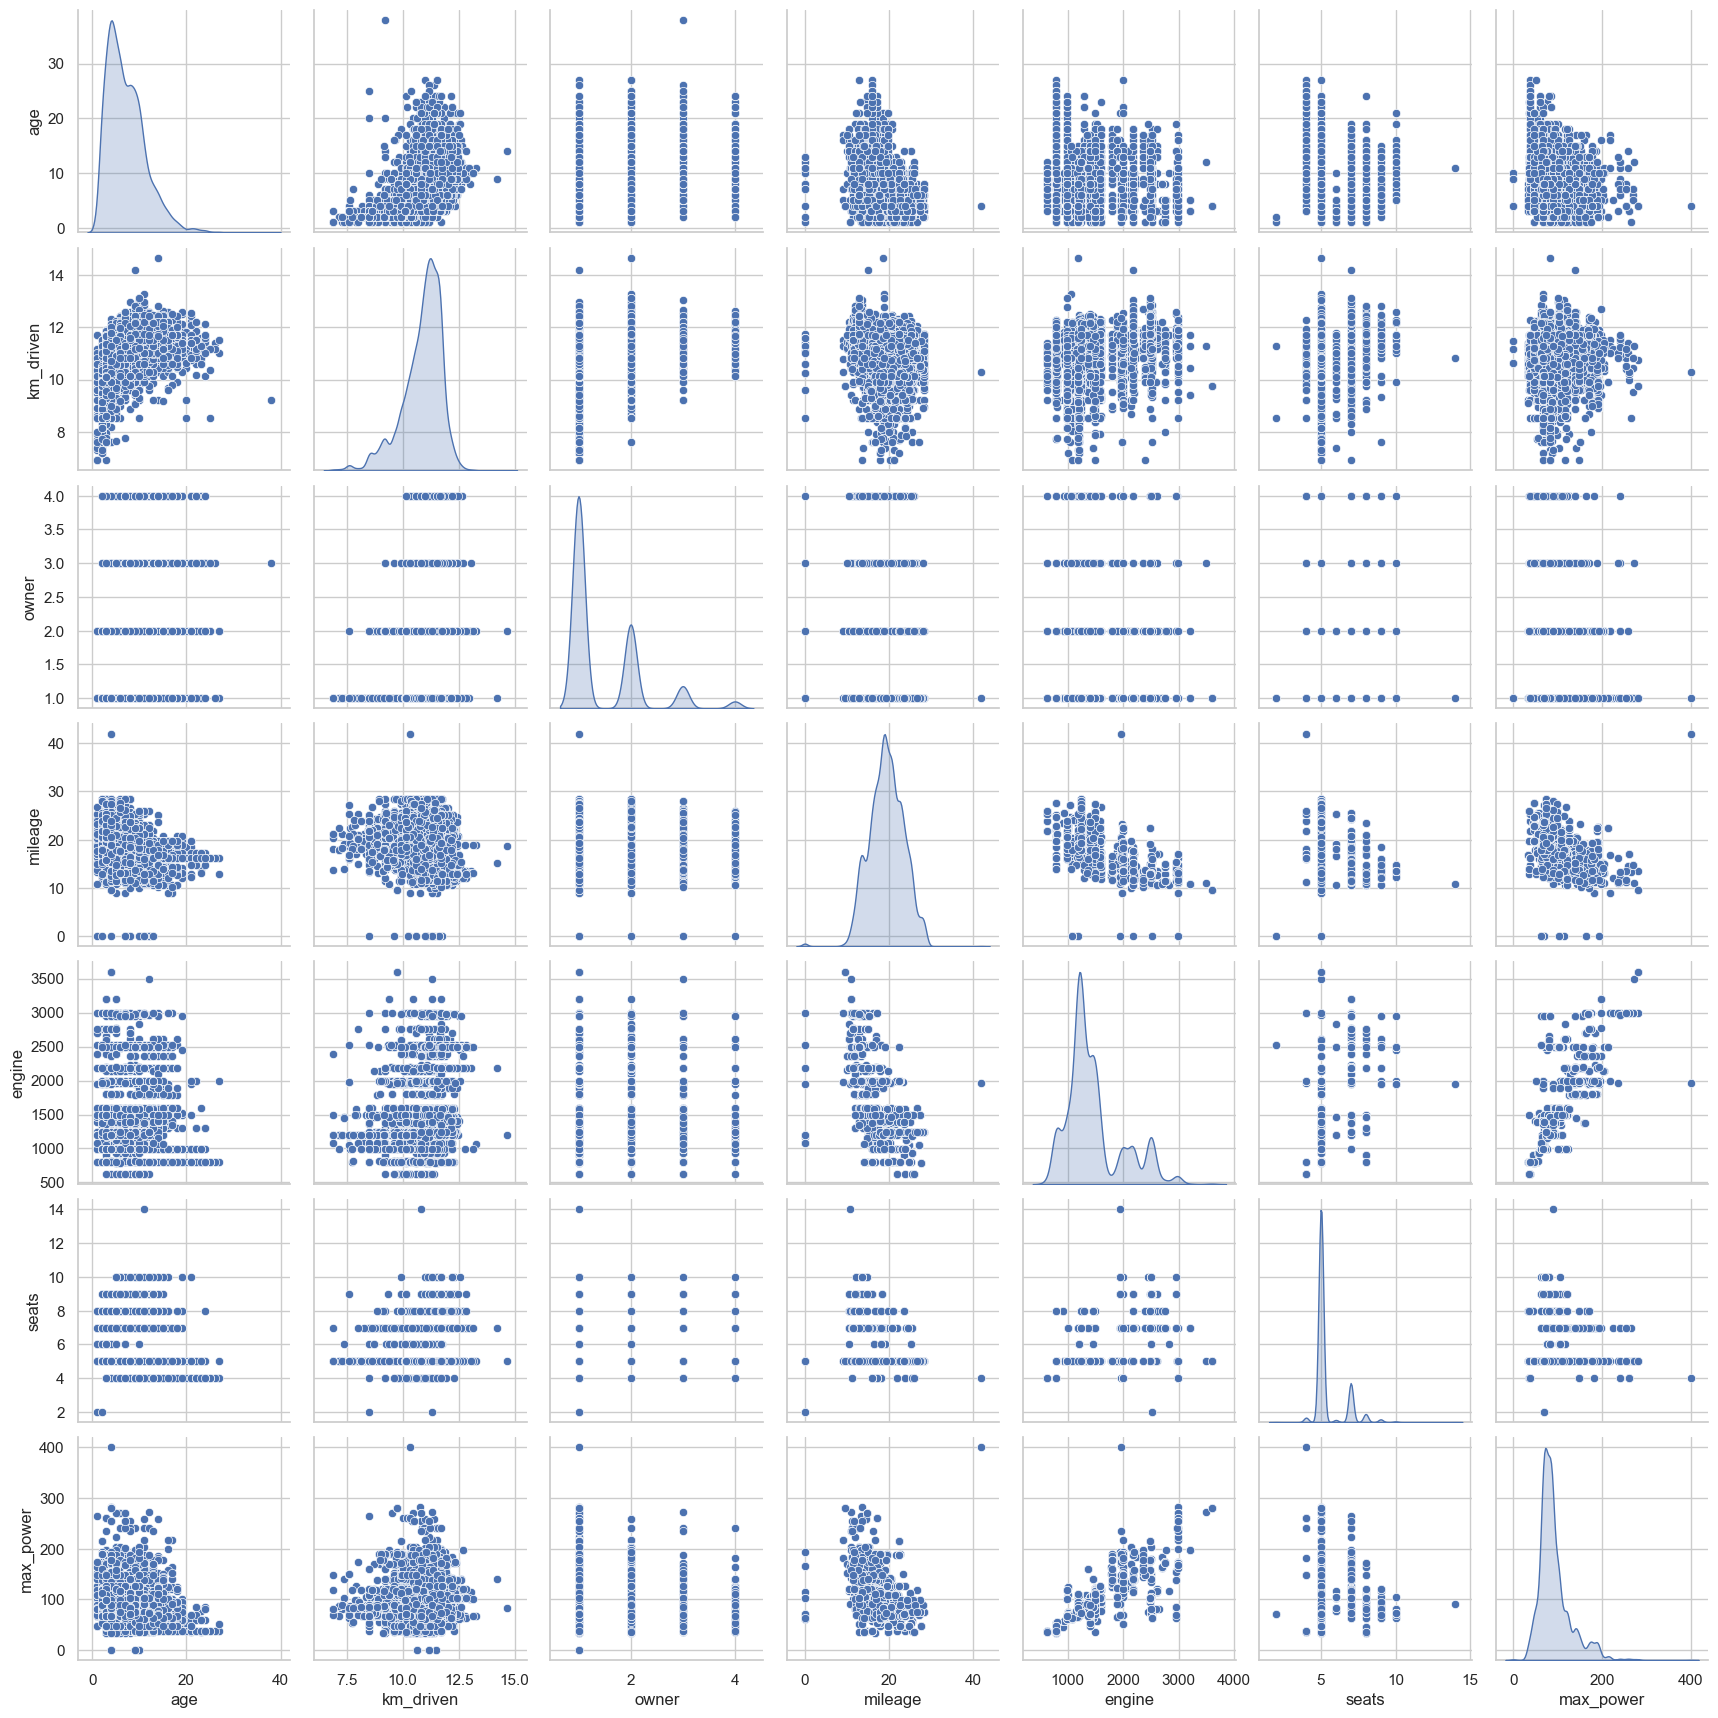

In [67]:
# Creating pairplot for the numerical columns specified, excluding 'year' which has been replaced by 'age'
sns.pairplot(data_frame_cp[numerical_cols], diag_kind='kde')
plt.show()

### Age:

The distribution for age appears to be right-skewed, meaning there are more newer cars in the dataset and fewer older ones.

There is a clear trend of older cars (higher age) having more kilometers driven.

There doesn't seem to be a strong direct relationship between age and the number of owners.

### Kilometers Driven:

The distribution is right-skewed, with many cars having lower kilometers driven and a few cars with very high kilometers.
Higher kilometers are somewhat associated with cars having more owners, which is logical as more usage can lead to ownership changes.

### Owners:

The majority of cars are first or second owners, with third and fourth owners being less common.
No strong correlation is apparent between the number of owners and engine size or power, but typically, cars with more owners have a wider range of kilometers driven.

### Mileage:

Most cars have a mileage in a moderate range, with very few extreme values.

### Engine:

The engine size distribution is right-skewed, with a majority of cars having smaller engines and fewer cars having very large engines.
 
There's a positive correlation between engine size and max power, which is expected as larger engines typically produce more power.

### Seats:

The number of seats clusters around 5, which is typical for most passenger cars. There are few cars with a higher number of seats.

### Max Power:

The distribution for 'max_power' is right-skewed, with most cars having a moderate amount of power and fewer high-performance cars with much higher max power.

In [68]:
data_frame_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   km_driven       8028 non-null   float64 
 1   fuel            8028 non-null   object  
 2   seller_type     8028 non-null   object  
 3   transmission    8028 non-null   object  
 4   owner           8028 non-null   int64   
 5   mileage         7814 non-null   float64 
 6   engine          7814 non-null   float64 
 7   max_power       7820 non-null   float64 
 8   seats           7814 non-null   float64 
 9   price_category  8028 non-null   category
 10  age             8028 non-null   int64   
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 697.9+ KB


In [69]:
# Categorical columns to be one-hot encoded
cat_cols = ['fuel', 'seller_type', 'transmission']
# Use pandas get_dummies to perform one-hot encoding on the specified categorical columns
# Drop_first=True is used to prevent multicollinearity by dropping the first category
data_frame_cp = pd.get_dummies(data_frame_cp, columns=cat_cols, drop_first=True)
# Display the first 5 rows of the modified DataFrame
data_frame_cp.head(5)

,km_driven,owner,mileage,engine,max_power,seats,price_category,age,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,11.887931,1,23.40,1248.0,74.00,5.0,1,7,0,1,0,1
1,11.695247,2,21.14,1498.0,103.52,5.0,1,7,0,1,0,1
2,11.849398,3,17.70,1497.0,78.00,5.0,0,15,1,1,0,1
3,11.751942,1,23.00,1396.0,90.00,5.0,0,11,0,1,0,1
4,11.695247,1,16.10,1298.0,88.20,5.0,0,14,1,1,0,1


In [70]:
# Convert price_category into one-hot encoded features
data_frame_cp = pd.get_dummies(data_frame_cp, columns=['price_category'], prefix='class')

In [71]:
data_frame_cp

,km_driven,owner,mileage,engine,max_power,seats,age,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
0,11.887931,1,23.40,1248.0,74.00,5.0,7,0,1,0,1,0,1,0,0
1,11.695247,2,21.14,1498.0,103.52,5.0,7,0,1,0,1,0,1,0,0
2,11.849398,3,17.70,1497.0,78.00,5.0,15,1,1,0,1,1,0,0,0
3,11.751942,1,23.00,1396.0,90.00,5.0,11,0,1,0,1,1,0,0,0
4,11.695247,1,16.10,1298.0,88.20,5.0,14,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.608236,1,18.50,1197.0,82.85,5.0,8,1,1,0,1,0,1,0,0
8124,11.686879,4,16.80,1493.0,110.00,5.0,14,0,1,0,1,1,0,0,0
8125,11.695247,1,19.30,1248.0,73.90,5.0,12,0,1,0,1,0,1,0,0
8126,10.126631,1,23.57,1396.0,70.00,5.0,8,0,1,0,1,0,1,0,0


#### Correlation Matrix

In [75]:
data_frame_cp.columns

Index(['km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats', 'age',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'class_0', 'class_1', 'class_2', 'class_3'],
      dtype='object')

In [76]:
cols = ['age', 'km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'class_0', 'class_1', 'class_2', 'class_3']
data_frame_cp = data_frame_cp[cols]
data_frame_cp

,age,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
0,7,11.887931,1,23.40,1248.0,74.00,5.0,0,1,0,1,0,1,0,0
1,7,11.695247,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,1,0,0
2,15,11.849398,3,17.70,1497.0,78.00,5.0,1,1,0,1,1,0,0,0
3,11,11.751942,1,23.00,1396.0,90.00,5.0,0,1,0,1,1,0,0,0
4,14,11.695247,1,16.10,1298.0,88.20,5.0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,8,11.608236,1,18.50,1197.0,82.85,5.0,1,1,0,1,0,1,0,0
8124,14,11.686879,4,16.80,1493.0,110.00,5.0,0,1,0,1,1,0,0,0
8125,12,11.695247,1,19.30,1248.0,73.90,5.0,0,1,0,1,0,1,0,0
8126,8,10.126631,1,23.57,1396.0,70.00,5.0,0,1,0,1,0,1,0,0


<Axes: >

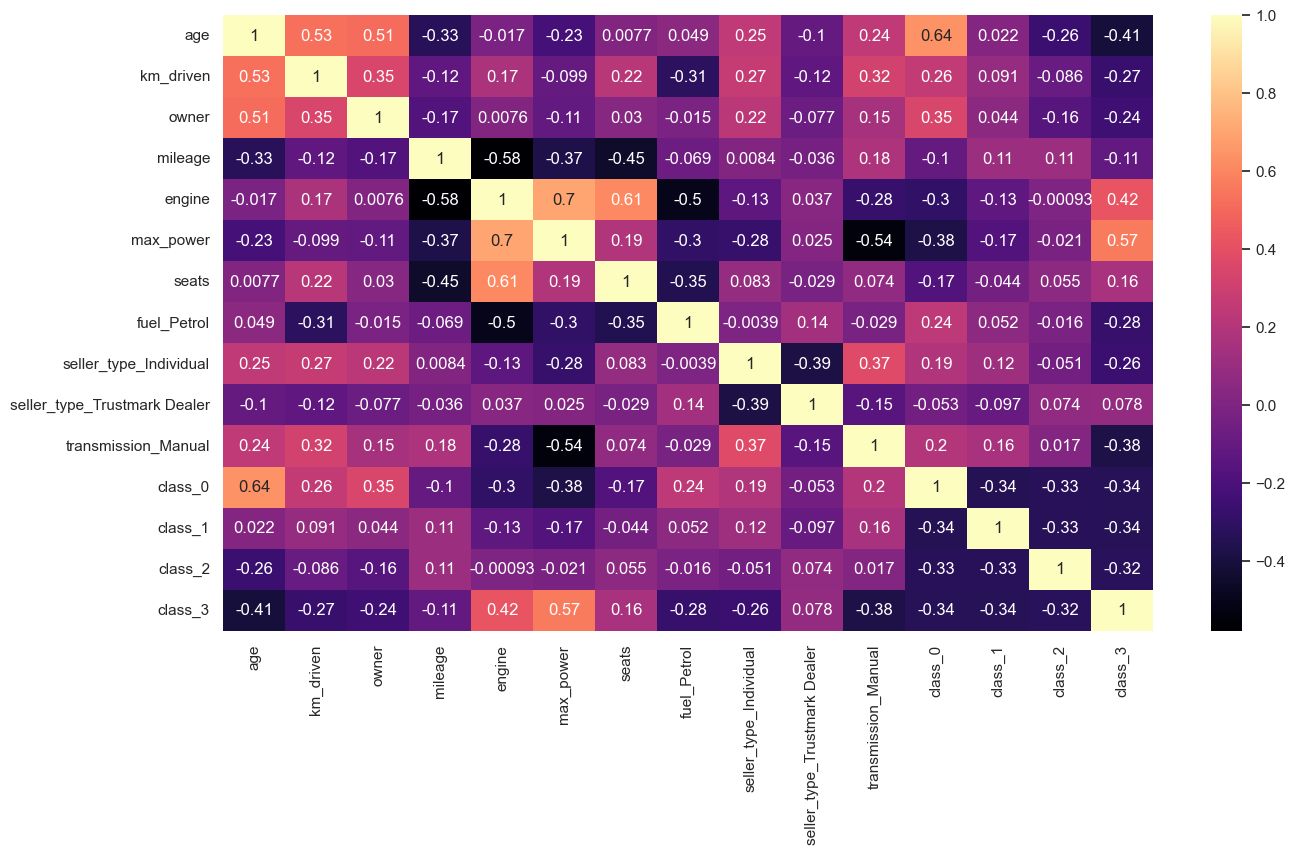

In [79]:
# correlation heatmap
plt.figure(figsize = (15,8))
sns.heatmap(data_frame_cp.corr(), annot=True, cmap="magma") 

### Age: 

There is a positive correlation between the age of a car and the kilometers driven (0.53) and the number of owners (0.51), indicating that older cars tend to have been driven more and have changed hands more frequently.

### Km Driven: 

The number of kilometers driven is positively correlated with the number of owners (0.35), which makes sense as cars that have been driven more are likely to have been owned by more people.

### Owner: 
The number of previous owners is not strongly correlated with mileage, engine size, or max power, suggesting that the wear and usage of a car are not necessarily reflected in its specifications.

### Mileage: 

There is a negative correlation between mileage and engine size (-0.58) and max power (-0.37), which is expected as larger, more powerful engines typically consume more fuel.

### Engine Size and Max Power: 

There is a strong positive correlation between engine size and max power (0.7), indicating that as engine size increases, so does the power output.

### Seats: 

There is a moderate positive correlation between seats and engine size (0.61) and max power (0.19), suggesting that larger cars with more seats tend to have bigger and more powerful engines.

### One-Hot Encoded Features:

Cars with manual transmission have a slight positive correlation with the number of kilometers driven (0.32) and the age of the car (0.24).
The seller type (Individual) is positively correlated with the age of the car (0.25) and kilometers driven (0.27).

### Price Categories (Classes):

The class_0 (likely representing the lowest price category) is positively correlated with the age of the car (0.64) and the number of owners (0.35), suggesting that older cars with more owners fall into this lower price category.
Higher price categories (class_3) show a negative correlation with age (-0.41) and a positive correlation with mileage (0.42), engine size (0.57), and max power (0.57), indicating that newer, more efficient, and powerful cars are likely to be in the higher price category.

#### Predictive Power Score

This is another way to check the predictive power of some feature.  Unlike correlation, `pps` actually obtained from actual prediction.  For more details:
    
- The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance
- The score is calculated on the test sets of a 4-fold crossvalidation (number is adjustable via `ppscore.CV_ITERATIONS`)
- All rows which have a missing value in the feature or the target column are dropped
- In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows with a fixed random seed (`ppscore.RANDOM_SEED`). You can adjust the number of rows or skip this sampling via the API. However, in most scenarios the results will be very similar.
- There is no grid search for optimal model parameters

We can install by doing <code>pip install ppscore</code>

In [81]:
import ppscore as pps
data_framecopy = data_frame_cp.copy()
data_framecopy.head(2)

,age,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
0,7,11.887931,1,23.40,1248.0,74.00,5.0,0,1,0,1,0,1,0,0
1,7,11.695247,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,1,0,0


<Axes: xlabel='x', ylabel='y'>

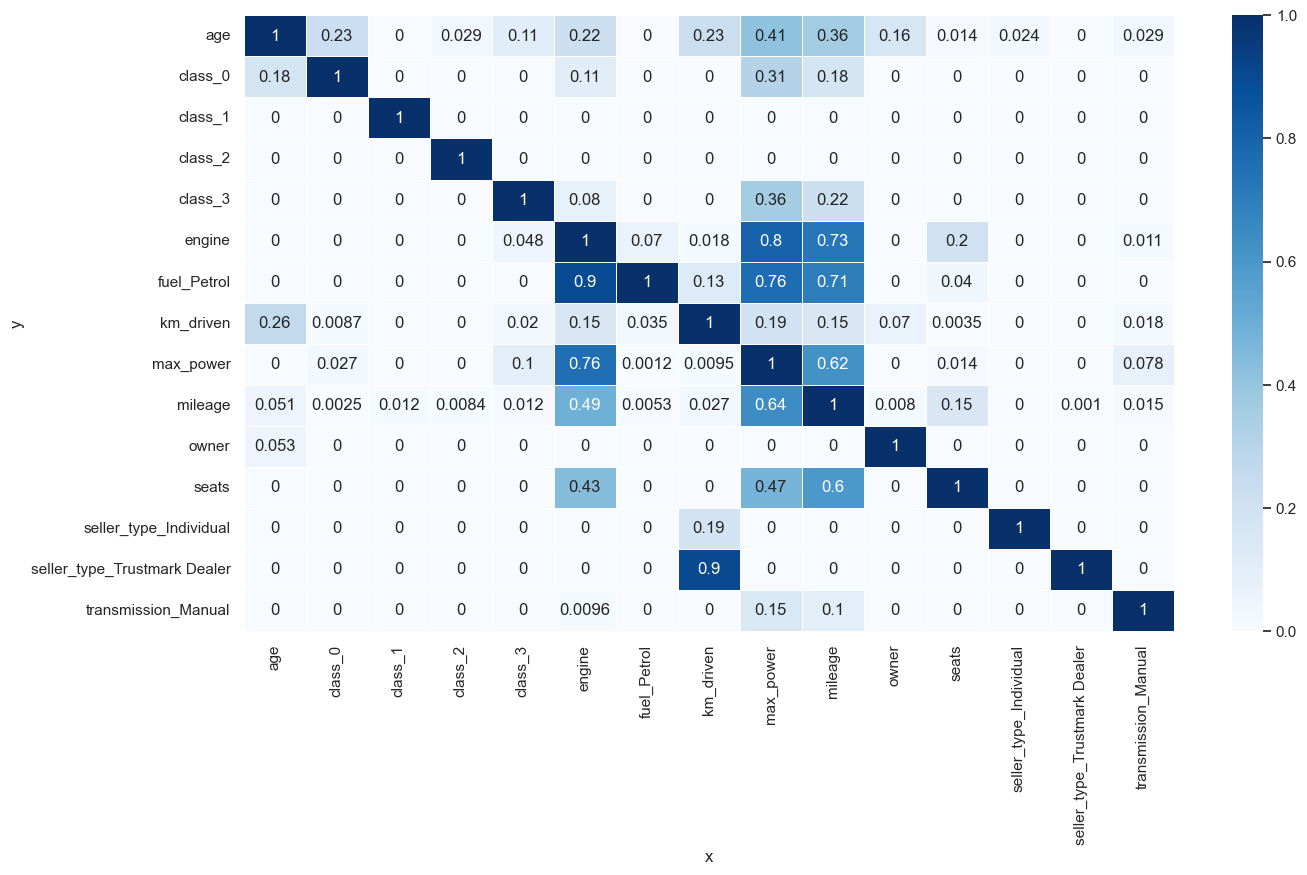

In [82]:
# Transforming the PPS matrix from the 'data_framecopy' into a format suitable for Seaborn's heatmap.
# Seaborn requires data in a wide format, so we pivot the DataFrame accordingly.
matrix_data_frame = pps.matrix(data_framecopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plotting the heatmap with the PPS matrix to visualize predictive relationships between variables.
# The 'vmin' and 'vmax' parameters set the scale of the heatmap to [0,1] for PPS values.
plot_lib.figure(figsize=(15, 8))
sns.heatmap(matrix_data_frame, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

### High PPS Scores: 

fuel_Petrol has high PPS scores with max_power (0.76) and engine (0.8), suggesting that the type of fuel can be a good predictor for the engine size and power of the car. Similarly, mileage has a strong predictive power with respect to max_power (0.64) and engine (0.49), which may reflect that cars with higher mileage tend to have larger engines and more power.


### Low PPS Scores: 

Scores close to 0 indicate a weak predictive relationship. For example, age has a low PPS score with class_0 (0.18), class_1, class_2, and class_3, suggesting that age alone might not be a strong predictor of the price category of the car.

### Other Notable Relationships:

km_driven has a modest predictive power with respect to age (0.26), which could be interpreted that as cars get older, they are likely to have been driven more.

seller_type_Individual has a high PPS score with transmission_Manual (0.9), indicating that individual sellers are more likely to sell manual cars.

In [83]:
matrix_data_frame

x,age,class_0,class_1,class_2,class_3,engine,fuel_Petrol,km_driven,max_power,mileage,owner,seats,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
y,,,,,,,,,,,,,,,
age,1.000000,0.225512,0.00000,0.028806,0.113058,0.222055,0.000000,0.230230,0.413778,0.360144,0.161160,0.013814,0.024045,0.000000,0.029026
class_0,0.181496,1.000000,0.00000,0.000000,0.000000,0.107147,0.000000,0.000000,0.306872,0.180306,0.000000,0.000000,0.000000,0.000000,0.000000
class_1,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
class_2,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
class_3,0.000000,0.000000,0.00000,0.000000,1.000000,0.079914,0.000000,0.000000,0.355587,0.220868,0.000000,0.000000,0.000000,0.000000,0.000000
engine,0.000000,0.000000,0.00000,0.000000,0.048113,1.000000,0.069660,0.017800,0.802366,0.728124,0.000000,0.202970,0.000000,0.000000,0.011422
fuel_Petrol,0.000000,0.000000,0.00000,0.000000,0.000000,0.895451,1.000000,0.132665,0.764726,0.705006,0.000000,0.040006,0.000000,0.000000,0.000000
km_driven,0.258445,0.008743,0.00000,0.000000,0.020449,0.152376,0.034890,1.000000,0.193885,0.154363,0.069688,0.003477,0.000000,0.000000,0.017851
max_power,0.000000,0.027186,0.00000,0.000000,0.102425,0.756933,0.001234,0.009492,1.000000,0.624556,0.000000,0.014336,0.000000,0.000000,0.077917


## 3. Feature Engineering
We skipped this part

## 4. Feature selection

In [84]:
data_frame_cp

,age,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
0,7,11.887931,1,23.40,1248.0,74.00,5.0,0,1,0,1,0,1,0,0
1,7,11.695247,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,1,0,0
2,15,11.849398,3,17.70,1497.0,78.00,5.0,1,1,0,1,1,0,0,0
3,11,11.751942,1,23.00,1396.0,90.00,5.0,0,1,0,1,1,0,0,0
4,14,11.695247,1,16.10,1298.0,88.20,5.0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,8,11.608236,1,18.50,1197.0,82.85,5.0,1,1,0,1,0,1,0,0
8124,14,11.686879,4,16.80,1493.0,110.00,5.0,0,1,0,1,1,0,0,0
8125,12,11.695247,1,19.30,1248.0,73.90,5.0,0,1,0,1,0,1,0,0
8126,8,10.126631,1,23.57,1396.0,70.00,5.0,0,1,0,1,0,1,0,0


In [85]:
data_frame_cp.columns

Index(['age', 'km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'class_0', 'class_1', 'class_2', 'class_3'],
      dtype='object')

We chose the specific features 'km_driven', 'max power', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual' for predicting the 'selling_price' for the following reasons -  

'km_driven': Indicates usage and wear, with lower mileage possibly commanding higher prices due to less perceived wear and longer remaining vehicle life.

'max_power': Represents the car's horsepower, a key factor in performance.

'age': Directly relates to a car's condition, with newer cars typically selling at higher prices. Expert consultation in Tokyo also confirmed that age is a primary factor in pricing used cars.

'engine': Engine size can be a proxy for performance and driving experience. Larger engines may attract a premium due to higher performance, as also noted by industry experts in Tokyo.

'fuel_Petrol': Different fuel types can influence operational costs and buyer demand, with petrol cars having their own market based on fuel preferences and potential environmental considerations.

'transmission_Manual': Affects the driving experience and may be preferred for its lower cost and control, potentially influencing the selling price based on market preferences for transmission types.

In [86]:
# Define a list of features selected for predicting the 'selling_price' based on their importance as indicated by EDA and domain expertise.
feature_list = ['km_driven', 'age', 'engine', 'max_power', 'fuel_Petrol', 'transmission_Manual']


In [89]:
data_frame_cp

,age,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
0,7,11.887931,1,23.40,1248.0,74.00,5.0,0,1,0,1,0,1,0,0
1,7,11.695247,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,1,0,0
2,15,11.849398,3,17.70,1497.0,78.00,5.0,1,1,0,1,1,0,0,0
3,11,11.751942,1,23.00,1396.0,90.00,5.0,0,1,0,1,1,0,0,0
4,14,11.695247,1,16.10,1298.0,88.20,5.0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,8,11.608236,1,18.50,1197.0,82.85,5.0,1,1,0,1,0,1,0,0
8124,14,11.686879,4,16.80,1493.0,110.00,5.0,0,1,0,1,1,0,0,0
8125,12,11.695247,1,19.30,1248.0,73.90,5.0,0,1,0,1,0,1,0,0
8126,8,10.126631,1,23.57,1396.0,70.00,5.0,0,1,0,1,0,1,0,0


In [90]:
# Create the feature matrix X by selecting the specified features
X = data_frame_cp[feature_list]

# Create the target vector y using the 'selling_price' column
y = data_frame_cp[['class_0', 'class_1', 'class_2', 'class_3']]


In [91]:
X

,km_driven,age,engine,max_power,fuel_Petrol,transmission_Manual
0,11.887931,7,1248.0,74.00,0,1
1,11.695247,7,1498.0,103.52,0,1
2,11.849398,15,1497.0,78.00,1,1
3,11.751942,11,1396.0,90.00,0,1
4,11.695247,14,1298.0,88.20,1,1
...,...,...,...,...,...,...
8123,11.608236,8,1197.0,82.85,1,1
8124,11.686879,14,1493.0,110.00,0,1
8125,11.695247,12,1248.0,73.90,0,1
8126,10.126631,8,1396.0,70.00,0,1


In [92]:
y

,class_0,class_1,class_2,class_3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
8123,0,1,0,0
8124,1,0,0,0
8125,0,1,0,0
8126,0,1,0,0


### Train test split

__using the train_test_split function from the sklearn.model_selection module to split your dataset into training and testing sets.__

In [93]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
# Set test_size to 0.3 for a 70-30 train-test split
# Use random_state for reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [95]:
# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 6), (2409, 6), (5619, 4), (2409, 4))

In [96]:
print("Total Dataset Size", X.shape[0])
print("Training Dataset Size", X_train.shape[0])
print("Test Dataset Size", X_test.shape[0])

Total Dataset Size 8028
Training Dataset Size 5619
Test Dataset Size 2409


In [97]:
# Perform an assertion to ensure that the number of samples in X_train matches y_train
assert X_train.shape[0] == y_train.shape[0]


## 5. Preprocessing

### Check Null values

In [98]:
# Verify for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven                0
age                      0
engine                 154
max_power              149
fuel_Petrol              0
transmission_Manual      0
dtype: int64

In [99]:
#   Verify for null values in the selected features of the test set
X_test[ feature_list].isna().sum()

km_driven               0
age                     0
engine                 60
max_power              59
fuel_Petrol             0
transmission_Manual     0
dtype: int64

In [100]:
# Verify for null values in the training target vector y_train
y_train.isna().sum()

class_0    0
class_1    0
class_2    0
class_3    0
dtype: int64

In [101]:
# Verify for null values in the training target vector y_test
y_test.isna().sum()

class_0    0
class_1    0
class_2    0
class_3    0
dtype: int64

__Among the 6 features 'max_power' and 'engine' contains null values__

In [104]:
# Impute the missing values in the 'engine' feature for both training and test sets
X_train['engine'].fillna(X_train['engine'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].mean(), inplace=True)

# Impute the missing values in the 'max_power' feature for both training and test sets
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)


In [105]:
# Verify again for null values 
X_train[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
max_power              0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [106]:
X_test[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
max_power              0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [107]:
#  Verify for null values in the training target vector y_train & test target vector y_test
y_train.isna().sum(), y_test.isna().sum()

(class_0    0
 class_1    0
 class_2    0
 class_3    0
 dtype: int64,
 class_0    0
 class_1    0
 class_2    0
 class_3    0
 dtype: int64)

### Checking Outliers

{'km_driven': 1, 'age': 2, 'engine': 3, 'max_power': 4, 'fuel_Petrol': 5, 'transmission_Manual': 6}


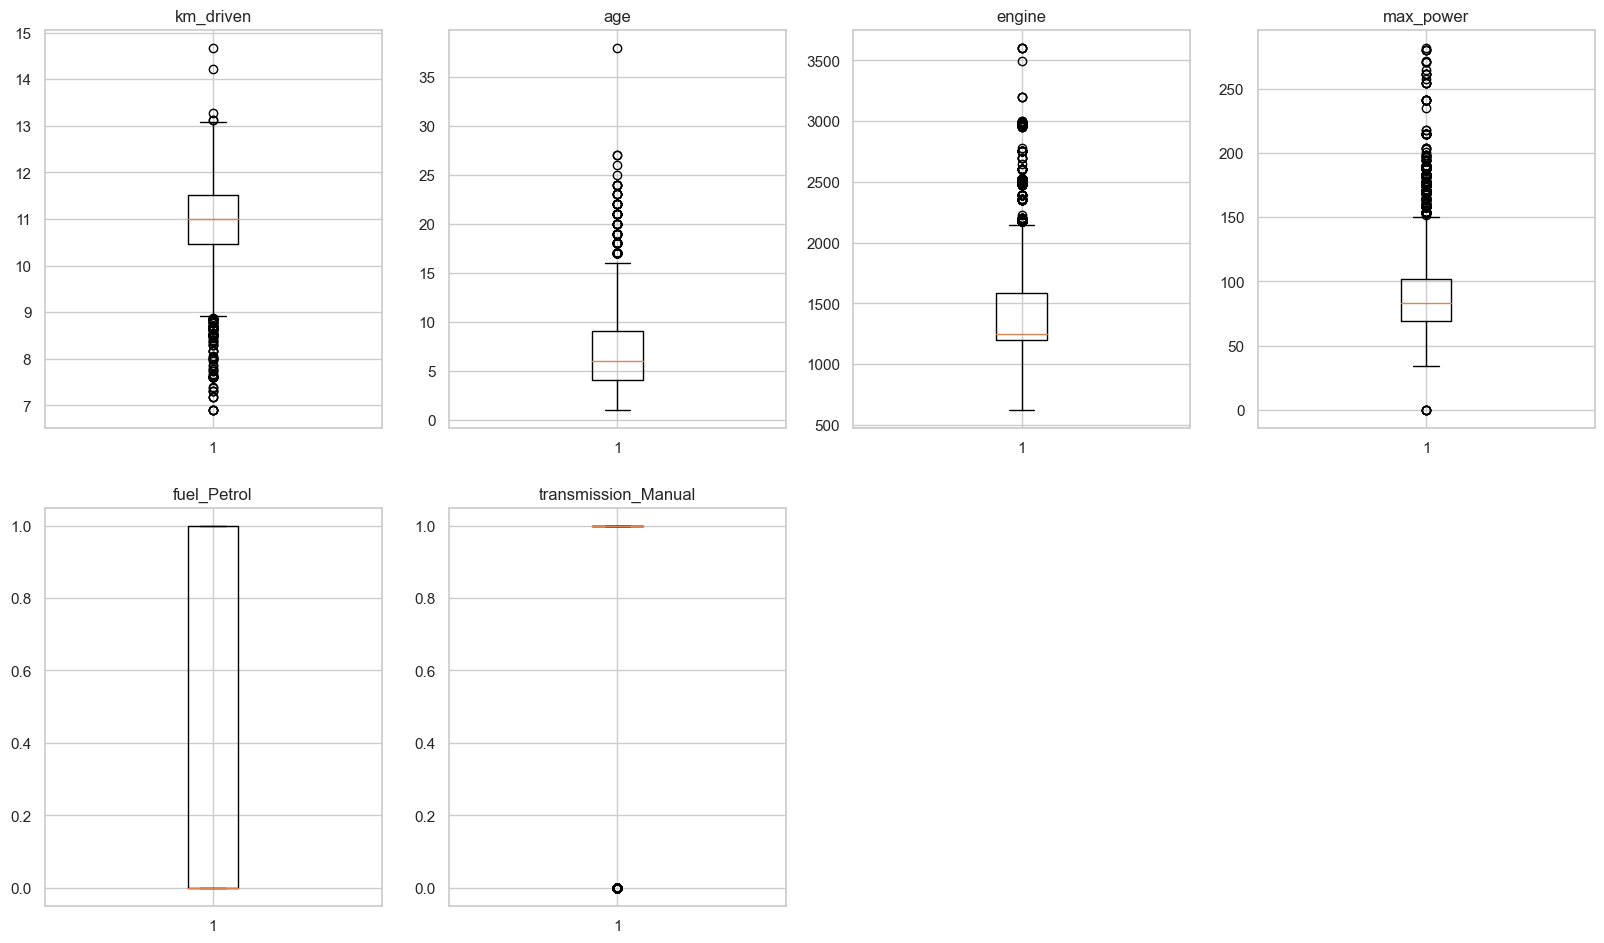

In [108]:
col_dict = {feature: indx+1 for indx, feature in enumerate(feature_list)}
print(col_dict)

# [ Detect outliers in each variable using box plots
plot_lib.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plot_lib.subplot(5,4,i)
                     plot_lib.boxplot(X_train[variable])
                     plot_lib.title(variable)

plot_lib.show()


In [109]:
def outlier_count(col, data=X_train):
    # Calculate the 75th and 25th percentiles
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # Calculate the interquartile range (IQR)
    iqr = q75 - q25
    
    # Define the minimum and maximum values for identifying outliers based on the IQR
    min_val = q25 - (iqr * 1.5)
    max_val = q75 + (iqr * 1.5)
    
    # Find the indices of outliers using NumPy
    outlier_indices = np.where((data[col] > max_val) | (data[col] < min_val))
    outlier_count = len(outlier_indices[0])
    
    # Calculate the percentage of outliers
    outlier_percent = round(outlier_count / len(data[col]) * 100, 2)
    
    if outlier_count > 0:
        print("\n" + 15 * '-' + col + 15 * '-' + "\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))


In [ ]:
# Iterate through the columns of the training feature matrix
for col in X_train.columns:
    # Print the name of the current column
    print(col)
    # Apply the 'outlier_count' function to detect and analyze outliers in the current column
    outlier_count(col)


km_driven

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%
age

---------------age---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%
engine

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%
max_power

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%
fuel_Petrol
transmission_Manual

---------------transmission_Manual---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%


 **Before Scalling we preserve mean of  the input feature (will be used later deployment where user won't input  value of a particular feature )**

In [110]:
max_year = data_frame['year'].max()
mean_age = X_train['age'].mean()
mean_km_driven = X_train['km_driven'].mean()
mean_engine_size = X_train['engine'].mean()
mean_max_power = X_train['max_power'].mean()
max_year,mean_age, mean_km_driven, mean_engine_size, mean_max_power

(2020,
 7.137924897668625,
 10.856184525614822,
 1463.855626715462,
 92.04935009140767)

### Scaling

__Feature scaling helps improve reach convergence faster__
- using the StandardScaler from sklearn.preprocessing to standardize the numerical features in the training and testing sets.
- Categorical features are typically represented as binary or one-hot encoded vectors. These representations are already in a consistent format that doesn't have varying magnitudes like numerical features.

In [113]:
from sklearn.preprocessing import StandardScaler

# List of continuous numerical features to be standardized
continuous_features = ['km_driven', 'age', 'engine', 'max_power']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected numerical features in the training set
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# Standardize the selected numerical features in the testing set
X_test[continuous_features] = scaler.transform(X_test[continuous_features])


In [114]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 6)
Shape of X_test:  (2409, 6)
Shape of y_train:  (5619, 4)
Shape of y_test:  (2409, 4)


In [117]:
import pickle
# Save the scaler's mean and scale parameters
scaler_path = "./scaler/scaler.pkl"
scaler_params = {
    'mean': scaler.mean_,
    'scale': scaler.scale_
}
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler_params, scaler_file)

## 6. Modeling


In [118]:
#copying train and test dataset 
X_train_cp = X_train.copy()
X_test_cp =  X_test.copy()

In [119]:
#add intercept in both training and testing feature
X_train_cp['intercept'] = 1
X_test_cp['intercept'] = 1

In [120]:
# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train_cp.values
X_test_np = X_test_cp.values

# Convert pandas Series to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

In [121]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "Tanzil"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="St123845-A3")

2023/12/02 15:51:52 INFO mlflow.tracking.fluent: Experiment with name 'St123845-A3' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/580899667319690378', creation_time=1701507112516, experiment_id='580899667319690378', last_update_time=1701507112516, lifecycle_stage='active', name='St123845-A3', tags={}>

In [122]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def accuracy(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        # Calculate the number of correct predictions
        num_correct = np.sum(Y_true == Y_pred)
        
        # Calculate the accuracy
        accuracy = num_correct / Y_true.shape[0]
        
        return accuracy
    
    def precision_recall_f1(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores = []
        recall_scores = []
        f1_scores = []

        for c in range(num_classes):
            # Calculate True Positives, False Positives, True Negatives, and False Negatives for class c
            TP_c = np.sum((Y_true == c) & (Y_pred == c))
            FP_c = np.sum((Y_true != c) & (Y_pred == c))
            TN_c = np.sum((Y_true != c) & (Y_pred != c))
            FN_c = np.sum((Y_true == c) & (Y_pred != c))

            # Calculate precision, recall, and F1-score for class c
            precision_c = TP_c / (TP_c + FP_c) if (TP_c + FP_c) > 0 else 0.0
            recall_c = TP_c / (TP_c + FN_c) if (TP_c + FN_c) > 0 else 0.0
            f1_c = 2 * precision_c * recall_c / (precision_c + recall_c) if (precision_c + recall_c) > 0 else 0.0

            precision_scores.append(precision_c)
            recall_scores.append(recall_c)
            f1_scores.append(f1_c)

        return precision_scores, recall_scores, f1_scores
    
    def macro_precision_recall_f1(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores, recall_scores, f1_scores = self.precision_recall_f1(Y_true, Y_pred)

        # Calculate macro precision, macro recall, and macro F1-score
        macro_precision = sum(precision_scores) / num_classes
        macro_recall = sum(recall_scores) / num_classes
        macro_f1 = sum(f1_scores) / num_classes

        return macro_precision, macro_recall, macro_f1
    
    def weighted_precision_recall_f1(self, Y_true, Y_pred, class_weights):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores, recall_scores, f1_scores = self.precision_recall_f1(Y_true, Y_pred)

        # Calculate weighted precision, weighted recall, and weighted F1-score
        weighted_precision = sum(p * w for p, w in zip(precision_scores, class_weights))
        weighted_recall = sum(r * w for r, w in zip(recall_scores, class_weights))
        weighted_f1 = sum(f * w for f, w in zip(f1_scores, class_weights))

        return weighted_precision, weighted_recall, weighted_f1

    

    def custom_classification_report_df(self, Y_true, Y_pred, class_names=None, class_weights=None):
        num_classes = self.k

        if class_names is None:
            class_names = [str(i) for i in range(num_classes)]

        # Calculate accuracy
        accuracy = self.accuracy(Y_true, Y_pred)

        # Calculate precision, recall, F1-score, and support
        precision, recall, f1 = self.precision_recall_f1(Y_true, Y_pred)

        support = []

        for c in range(num_classes):
            # Calculate support for class c
            support_c = np.sum(Y_true == c)
            support.append(support_c)

        # Calculate macro and weighted metrics
        macro_precision, macro_recall, macro_f1 = self.macro_precision_recall_f1(Y_true, Y_pred)

        if class_weights is None:
            # If class_weights is not provided, assume equal weights for all classes
            class_weights = [1.0] * num_classes
            
        weighted_precision, weighted_recall, weighted_f1 = self.weighted_precision_recall_f1(Y_true, Y_pred, class_weights)

        # Create a DataFrame to store the classification report
        report_df = pd.DataFrame({
            'Class': class_names,
            'Precision': [round(p, 2) for p in precision],
            'Recall': [round(r, 2) for r in recall],
            'F1-Score': [round(f, 2) for f in f1],
            'Support': support
        })

        # Add accuracy, macro, and weighted metrics to the DataFrame
        report_df = report_df.append({
            'Class': 'Accuracy',
            'Precision': round(accuracy, 2),
            'Recall': '',
            'F1-Score': '',
            'Support': len(Y_true) 
        }, ignore_index=True)

        report_df = report_df.append({
            'Class': 'Macro Avg',
            'Precision': round(macro_precision, 2),
            'Recall': round(macro_recall, 2),
            'F1-Score': round(macro_f1, 2),
            'Support': len(Y_true) 
        }, ignore_index=True)

        report_df = report_df.append({
            'Class': 'Weighted Avg',
            'Precision': round(weighted_precision, 2),
            'Recall': round(weighted_recall, 2),
            'F1-Score': round(weighted_f1, 2),
            'Support': len(Y_true) 
        }, ignore_index=True)

        return report_df
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

In [123]:
class RidgeLogisticRegression(LogisticRegression):

    def __init__(self, k, n, method, alpha=0.001, max_iter=5000, lambda_=1.0):
        super().__init__(k, n, method, alpha, max_iter)
        self.lambda_ = lambda_

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = -np.sum(Y * np.log(h)) / m
        error = h - Y

        # Calculate the gradient with the L2 regularization term
        grad = self.softmax_grad(X, error) + 2 * self.lambda_ * self.W

        return loss, grad


In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [127]:
import time
methods = ['batch', 'sto','minibatch']
alpha_li =  [0.01, 0.001, 0.0001]

for method in methods:
    for lr in alpha_li:
        params = {"method": method,"lr": lr, "lambda": 0.1}
        print(params)
        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{'Ridgle'}-lambda-{params['lambda']}", nested=True)
        ridge_model = RidgeLogisticRegression(k=4, n=7, method=params['method'],alpha=params['lr'], lambda_=params['lambda'])
        ridge_model.fit(X_train_np, y_train_np)

        # Make predictions on the test data
        ridge_Y_test_pred = ridge_model.predict(X_test_np)

        accuracy_scratch = ridge_model.accuracy(y_test_np.argmax(axis=1), ridge_Y_test_pred)
        mlflow.log_metrics({
        'Accuracy': accuracy_scratch
        })
        
        precision, recall, f1 = ridge_model.precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred)

        # macro_precision_recall_f1 returns macro metrics
        macro_precision, macro_recall, macro_f1 = ridge_model.macro_precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred)

        # Log precision, recall, F1 score, and accuracy as metrics
        mlflow.log_metrics({
            'Macro Precision': macro_precision,
            'Macro Recall': macro_recall,
            'Macro F1-Score': macro_f1,
        })

        # weighted_precision_recall_f1 returns weighted metrics
        weighted_precision, weighted_recall, weighted_f1 = ridge_model.weighted_precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred, [0.2, 0.3, 0.2, 0.3])

        mlflow.log_metrics({
            'Weighted Precision': weighted_precision,
            'Weighted Recall': weighted_recall,
            'Weighted F1-Score': weighted_f1,
        })


        cus_class_report = ridge_model.custom_classification_report_df(y_test_np.argmax(axis=1), ridge_Y_test_pred,class_weights=[0.2, 0.3, 0.2, 0.3])

        sk_class_report = classification_report(y_test_np.argmax(axis=1), ridge_Y_test_pred)
        
        print('Custom Classification Report:')
        display(cus_class_report)
        print('sklearn Classification Report:')
        print(sk_class_report)
        print("-"*50)

        signature = mlflow.models.infer_signature(X_train_np, ridge_model.predict(X_train_np))
        mlflow.sklearn.log_model(ridge_model, artifact_path='model', signature=signature)
        # ridge_model.plot()
        mlflow.end_run() 

{'method': 'batch', 'lr': 0.01, 'lambda': 0.1}
Loss at iteration 0 1.5175023482790957
Loss at iteration 500 9.897149529429349
Loss at iteration 1000 10.019298931665526
Loss at iteration 1500 6.731074628643342
Loss at iteration 2000 7.649635293248092
Loss at iteration 2500 7.763274140137538
Loss at iteration 3000 8.348736965020228
Loss at iteration 3500 7.003694170920024
Loss at iteration 4000 3.955021902316177
Loss at iteration 4500 10.861855410899917
time taken: 3.8033013343811035
Custom Classification Report:


,Class,Precision,Recall,F1-Score,Support
0,0,0.87,0.7,0.78,633
1,1,0.48,0.84,0.61,627
2,2,0.50,0.0,0.0,561
3,3,0.68,0.9,0.78,588
4,Accuracy,0.63,,,2409
5,Macro Avg,0.63,0.61,0.54,2409
6,Weighted Avg,0.62,0.67,0.57,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       633
           1       0.48      0.84      0.61       627
           2       0.50      0.00      0.00       561
           3       0.68      0.90      0.78       588

    accuracy                           0.63      2409
   macro avg       0.63      0.61      0.54      2409
weighted avg       0.63      0.63      0.55      2409

--------------------------------------------------
{'method': 'batch', 'lr': 0.001, 'lambda': 0.1}
Loss at iteration 0 1.5750929590290061
Loss at iteration 500 1.0608628717505306
Loss at iteration 1000 1.0593206246810456
Loss at iteration 1500 1.0590364857820376
Loss at iteration 2000 1.0589819958336284
Loss at iteration 2500 1.058971475332662
Loss at iteration 3000 1.0589694414525417
Loss at iteration 3500 1.0589690481521707
Loss at iteration 4000 1.058968972094215
Loss at iteration 4500 1.0589689573856922
time taken: 3.5678527

,Class,Precision,Recall,F1-Score,Support
0,0,0.66,0.95,0.78,633
1,1,0.77,0.02,0.03,627
2,2,0.44,0.89,0.59,561
3,3,0.91,0.52,0.66,588
4,Accuracy,0.59,,,2409
5,Macro Avg,0.69,0.6,0.51,2409
6,Weighted Avg,0.72,0.53,0.48,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.95      0.78       633
           1       0.77      0.02      0.03       627
           2       0.44      0.89      0.59       561
           3       0.91      0.52      0.66       588

    accuracy                           0.59      2409
   macro avg       0.69      0.60      0.51      2409
weighted avg       0.70      0.59      0.51      2409

--------------------------------------------------
{'method': 'batch', 'lr': 0.0001, 'lambda': 0.1}
Loss at iteration 0 1.7448528021616527
Loss at iteration 500 0.6947040390220978
Loss at iteration 1000 0.691872865981834
Loss at iteration 1500 0.6912228326002997
Loss at iteration 2000 0.690903947034767
Loss at iteration 2500 0.6907201277582988
Loss at iteration 3000 0.6906086161862997
Loss at iteration 3500 0.6905388414073144
Loss at iteration 4000 0.6904941020785124
Loss at iteration 4500 0.6904647984800834
time taken: 3.547660

,Class,Precision,Recall,F1-Score,Support
0,0,0.84,0.82,0.83,633
1,1,0.60,0.62,0.61,627
2,2,0.54,0.59,0.56,561
3,3,0.82,0.74,0.78,588
4,Accuracy,0.69,,,2409
5,Macro Avg,0.70,0.69,0.7,2409
6,Weighted Avg,0.70,0.69,0.7,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       633
           1       0.60      0.62      0.61       627
           2       0.54      0.59      0.56       561
           3       0.82      0.74      0.78       588

    accuracy                           0.69      2409
   macro avg       0.70      0.69      0.70      2409
weighted avg       0.70      0.69      0.70      2409

--------------------------------------------------
{'method': 'sto', 'lr': 0.01, 'lambda': 0.1}
Loss at iteration 0 2.0074661042547612
Loss at iteration 500 1.313704412150336
Loss at iteration 1000 1.2605488142963275
Loss at iteration 1500 1.207422151925867
Loss at iteration 2000 1.0128994963265665
Loss at iteration 2500 1.3242253946587539
Loss at iteration 3000 1.2779863319283338
Loss at iteration 3500 1.160136924250515
Loss at iteration 4000 1.3043884660783276
Loss at iteration 4500 0.4032593828732014
time taken: 0.47531437873

,Class,Precision,Recall,F1-Score,Support
0,0,0.63,0.96,0.76,633
1,1,0.68,0.02,0.05,627
2,2,0.46,0.72,0.56,561
3,3,0.73,0.7,0.71,588
4,Accuracy,0.60,,,2409
5,Macro Avg,0.63,0.6,0.52,2409
6,Weighted Avg,0.64,0.55,0.49,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.96      0.76       633
           1       0.68      0.02      0.05       627
           2       0.46      0.72      0.56       561
           3       0.73      0.70      0.71       588

    accuracy                           0.60      2409
   macro avg       0.63      0.60      0.52      2409
weighted avg       0.63      0.60      0.52      2409

--------------------------------------------------
{'method': 'sto', 'lr': 0.001, 'lambda': 0.1}
Loss at iteration 0 1.9518489494792817
Loss at iteration 500 0.9359613857184169
Loss at iteration 1000 1.4548195916599123
Loss at iteration 1500 0.8021998843173451
Loss at iteration 2000 1.0161349145189338
Loss at iteration 2500 0.7737549365314415
Loss at iteration 3000 1.1284104679030549
Loss at iteration 3500 1.7503608507209123
Loss at iteration 4000 1.567575219592004
Loss at iteration 4500 1.1424668237676494
time taken: 0.53178596

,Class,Precision,Recall,F1-Score,Support
0,0,0.58,0.97,0.72,633
1,1,0.33,0.09,0.15,627
2,2,0.45,0.41,0.43,561
3,3,0.70,0.78,0.74,588
4,Accuracy,0.56,,,2409
5,Macro Avg,0.51,0.56,0.51,2409
6,Weighted Avg,0.51,0.54,0.5,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.97      0.72       633
           1       0.33      0.09      0.15       627
           2       0.45      0.41      0.43       561
           3       0.70      0.78      0.74       588

    accuracy                           0.56      2409
   macro avg       0.51      0.56      0.51      2409
weighted avg       0.51      0.56      0.51      2409

--------------------------------------------------
{'method': 'sto', 'lr': 0.0001, 'lambda': 0.1}
Loss at iteration 0 0.39331924039292465
Loss at iteration 500 1.726372971757291
Loss at iteration 1000 1.0130976514659116
Loss at iteration 1500 1.5015259478844893
Loss at iteration 2000 1.7330206210188694
Loss at iteration 2500 0.7286559785993277
Loss at iteration 3000 0.8273482261587071
Loss at iteration 3500 1.8268973427246575
Loss at iteration 4000 1.5958342503634169
Loss at iteration 4500 1.8458646169555128
time taken: 0.528420

,Class,Precision,Recall,F1-Score,Support
0,0,0.98,0.14,0.24,633
1,1,0.30,0.08,0.13,627
2,2,0.18,0.38,0.24,561
3,3,0.48,0.78,0.6,588
4,Accuracy,0.34,,,2409
5,Macro Avg,0.49,0.35,0.3,2409
6,Weighted Avg,0.47,0.36,0.32,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.14      0.24       633
           1       0.30      0.08      0.13       627
           2       0.18      0.38      0.24       561
           3       0.48      0.78      0.60       588

    accuracy                           0.34      2409
   macro avg       0.49      0.35      0.30      2409
weighted avg       0.49      0.34      0.30      2409

--------------------------------------------------
{'method': 'minibatch', 'lr': 0.01, 'lambda': 0.1}
Loss at iteration 0 1.436107695938081
Loss at iteration 500 1.3129052433028712
Loss at iteration 1000 1.9235144422913484
Loss at iteration 1500 1.5686531233609375
Loss at iteration 2000 4.044184017126095
Loss at iteration 2500 2.9717888517249995
Loss at iteration 3000 1.656907912856356
Loss at iteration 3500 1.7559802350146065
Loss at iteration 4000 4.674479123956213
Loss at iteration 4500 2.3671931839455427
time taken: 1.200924

,Class,Precision,Recall,F1-Score,Support
0,0,0.86,0.77,0.81,633
1,1,0.58,0.68,0.63,627
2,2,0.54,0.57,0.55,561
3,3,0.81,0.71,0.75,588
4,Accuracy,0.68,,,2409
5,Macro Avg,0.70,0.68,0.69,2409
6,Weighted Avg,0.70,0.68,0.69,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       633
           1       0.58      0.68      0.63       627
           2       0.54      0.57      0.55       561
           3       0.81      0.71      0.75       588

    accuracy                           0.68      2409
   macro avg       0.70      0.68      0.69      2409
weighted avg       0.70      0.68      0.69      2409

--------------------------------------------------
{'method': 'minibatch', 'lr': 0.001, 'lambda': 0.1}
Loss at iteration 0 1.4617644377619323
Loss at iteration 500 0.6957812637002165
Loss at iteration 1000 0.6843054876671233
Loss at iteration 1500 0.6744518056850695
Loss at iteration 2000 0.6791304712415921
Loss at iteration 2500 0.6774424886123969
Loss at iteration 3000 0.6763117418949791
Loss at iteration 3500 0.6831387283966243
Loss at iteration 4000 0.6708630915562478
Loss at iteration 4500 0.6981677018902375
time taken: 1.1

,Class,Precision,Recall,F1-Score,Support
0,0,0.83,0.84,0.83,633
1,1,0.62,0.6,0.61,627
2,2,0.53,0.63,0.58,561
3,3,0.83,0.7,0.76,588
4,Accuracy,0.69,,,2409
5,Macro Avg,0.70,0.69,0.7,2409
6,Weighted Avg,0.71,0.69,0.69,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       633
           1       0.62      0.60      0.61       627
           2       0.53      0.63      0.58       561
           3       0.83      0.70      0.76       588

    accuracy                           0.69      2409
   macro avg       0.70      0.69      0.70      2409
weighted avg       0.71      0.69      0.70      2409

--------------------------------------------------
{'method': 'minibatch', 'lr': 0.0001, 'lambda': 0.1}
Loss at iteration 0 1.7048957255124342
Loss at iteration 500 0.7114996332424425
Loss at iteration 1000 0.7047747080917369
Loss at iteration 1500 0.6925099833776867
Loss at iteration 2000 0.6956973556160249
Loss at iteration 2500 0.6791193680122288
Loss at iteration 3000 0.6948496774441829
Loss at iteration 3500 0.7051847608059522
Loss at iteration 4000 0.6821843352278496
Loss at iteration 4500 0.6782441302519416
time taken: 1.

,Class,Precision,Recall,F1-Score,Support
0,0,0.84,0.83,0.83,633
1,1,0.61,0.62,0.62,627
2,2,0.54,0.59,0.56,561
3,3,0.82,0.73,0.77,588
4,Accuracy,0.69,,,2409
5,Macro Avg,0.70,0.69,0.7,2409
6,Weighted Avg,0.70,0.69,0.69,2409


sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       633
           1       0.61      0.62      0.62       627
           2       0.54      0.59      0.56       561
           3       0.82      0.73      0.77       588

    accuracy                           0.69      2409
   macro avg       0.70      0.69      0.70      2409
weighted avg       0.70      0.69      0.70      2409

--------------------------------------------------


In [ ]:
stop

## 8. Inference

To provide inference service or deploy, it's best to save the model for latter use.

We found the Normal Linear Regression model works better in our case with  below configuratrion- 
 - Method: stochastic 
 - Momentum: 0 
 - Theta Init: xavier 
 - Learning Rate: 0.01
 
 The choosen model's Accuracy- 
  - MSE 0.096
  - R^2 0.85
  
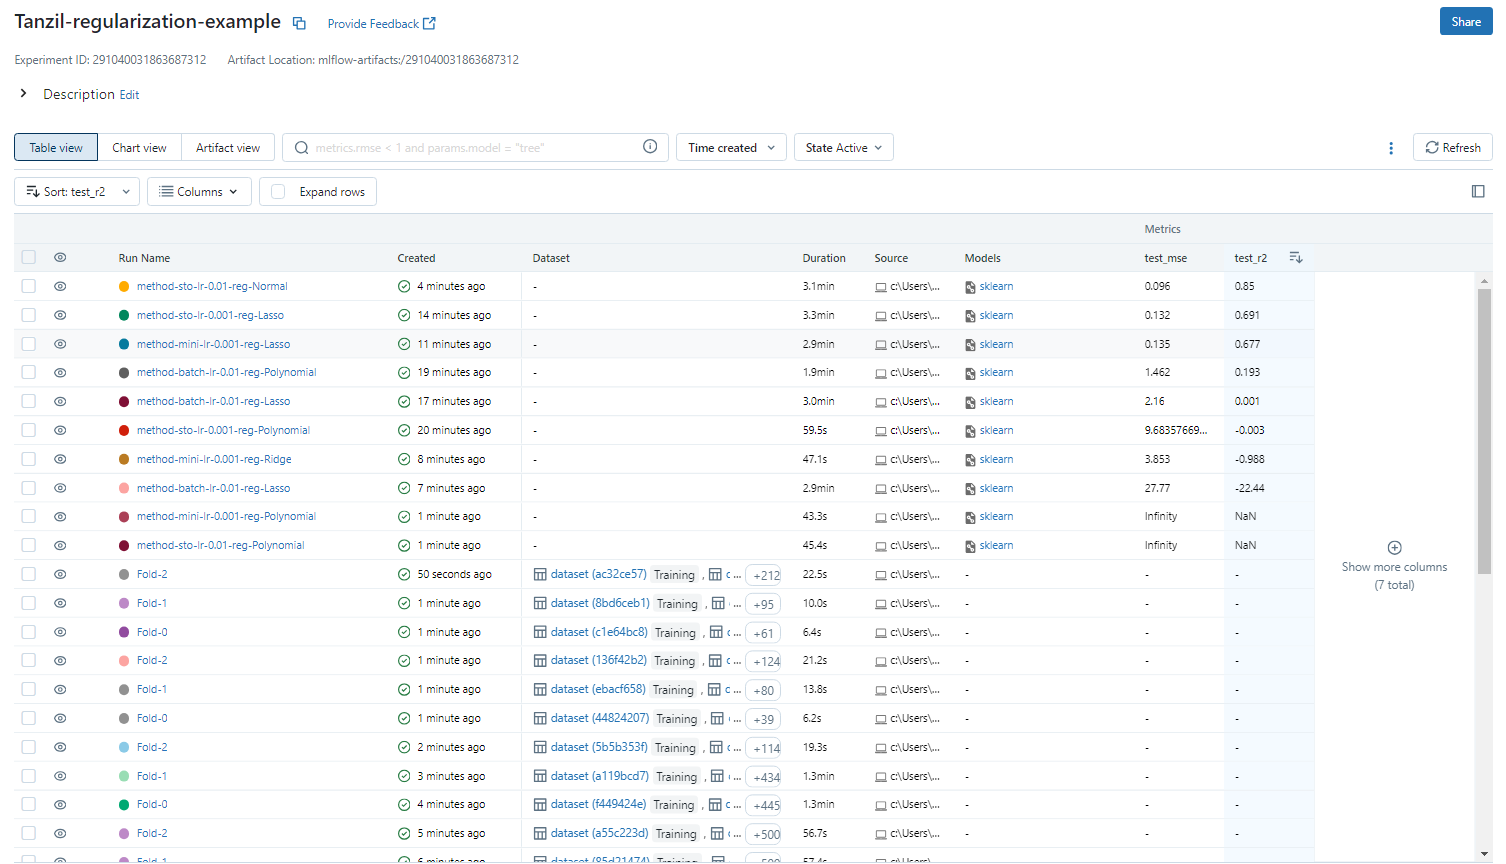

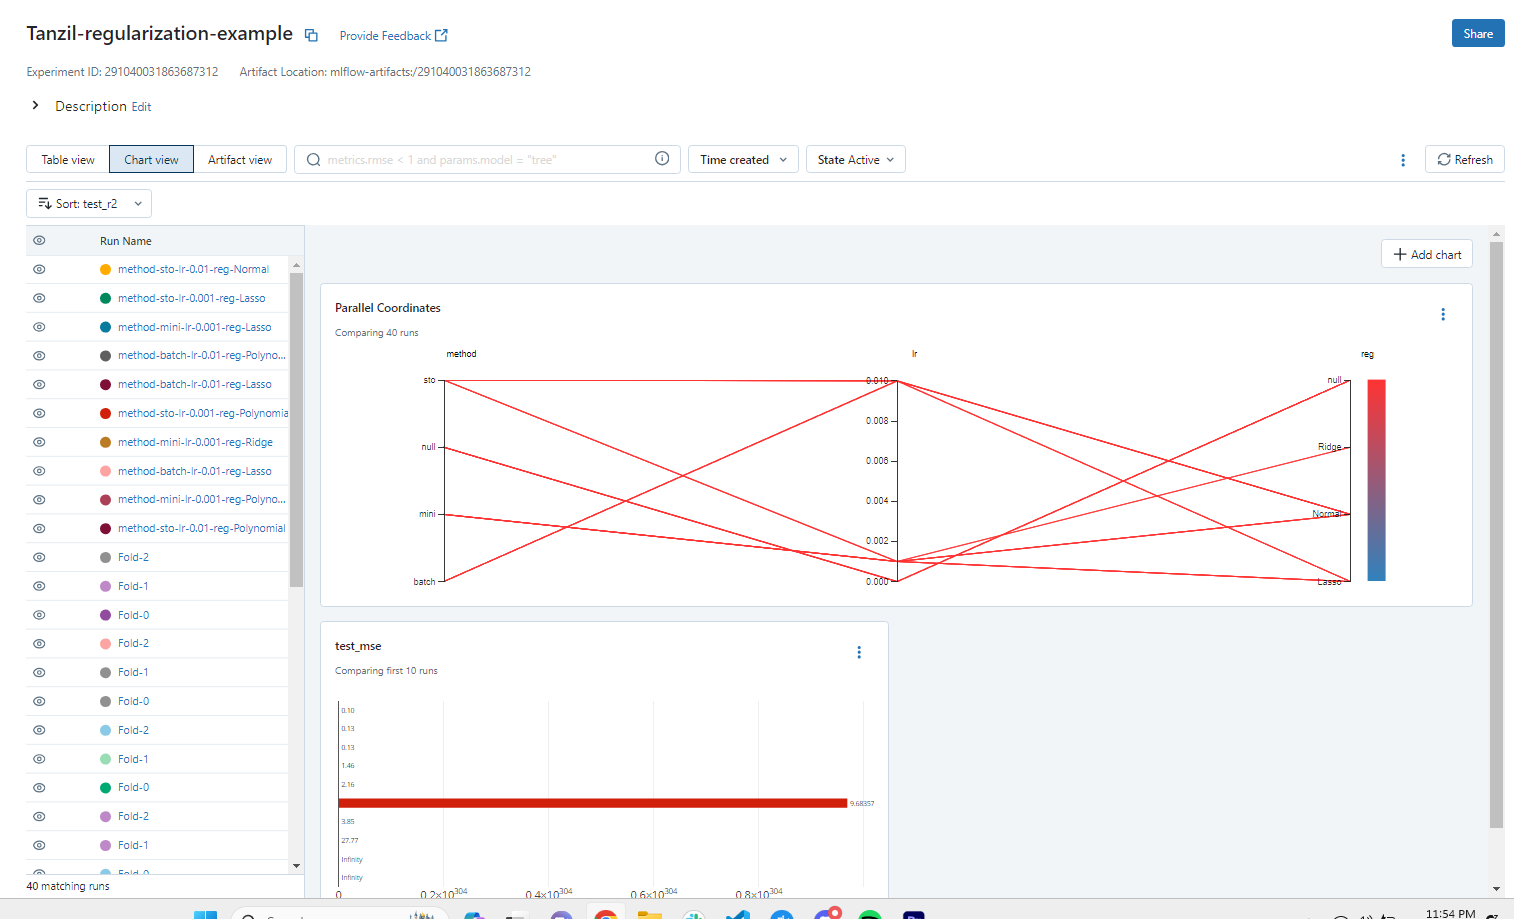

In [ ]:
#Checking the model from MLFLOW
import mlflow
logged_model = 'runs:/ed0c98bd6ebc417d9d134db73f02222c/model'
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)


data = X_test_np[100].reshape(1,-1)
predPrice = loaded_model.predict(data)[0]
print(np.exp(y_test_np[101]), np.exp(predPrice))

3200000.000000002 429728.21880540403


(2409, 7) [[-0.58207856  0.71572536 -0.1923894  ...  1.          1.
   1.        ]
 [ 0.66416893 -0.53463554  0.23712458 ...  0.          1.
   1.        ]
 [-0.16666273 -0.28456336 -0.93500701 ...  1.          1.
   1.        ]
 ...
 [-0.68177836  0.96579754 -0.58577603 ...  1.          1.
   1.        ]
 [-0.89447126 -0.78470772 -0.43323835 ...  0.          1.
   1.        ]
 [-0.99749439 -0.78470772 -1.30430875 ...  1.          1.
   1.        ]]
MSE Accuracy on Test data 0.09629507522065932
R^2 Accuracy on Test data 0.8631369007305472


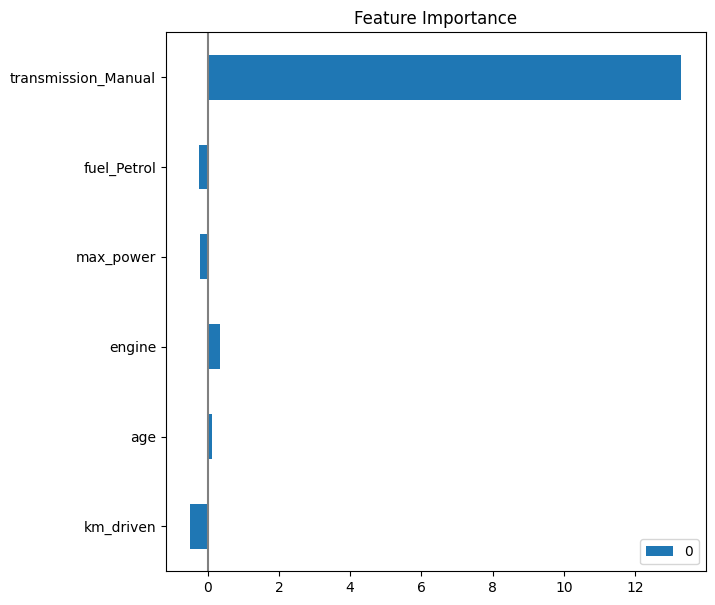

In [ ]:
import pickle
logged_model = 'app/code/model/method-sto-lr-0.01-reg-Normal.pkl'

# Load model as a PyFuncModel.
loaded_model = pickle.load(open(logged_model, 'rb'))


# Predict on a Pandas DataFrame.
import pandas as pd

data = X_test_np
print(data.shape, data)
predPrices = loaded_model.predict(data)
print("MSE Accuracy on Test data",loaded_model.mse(y_test_np,predPrices))
print("R^2 Accuracy on Test data",loaded_model.r2_score(y_test_np,predPrices))
loaded_model.feature_importance(feature_list)

**transmission_Manual has highest influence on selling price.**

**Engine and Age have a positive influence on the selling price**

**Fuel_Petrol, max_power, km_driven have a negative influnce on the selling price of a car**

In [ ]:
#check feature list order for user inference 
feature_list

['km_driven',
 'age',
 'engine',
 'max_power',
 'fuel_Petrol',
 'transmission_Manual']

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
logged_model = 'app/code/model/method-sto-lr-0.01-reg-Normal.pkl'
# Load model as a PyFuncModel.
loaded_model = pickle.load(open(logged_model, 'rb'))

#load scaler used in the training time 
scaler_path = "app/code/model/scaler.pkl"
loaded_scaler_params = pickle.load(open(scaler_path, 'rb'))
loaded_scaler = StandardScaler()
loaded_scaler.mean_ = loaded_scaler_params['mean']
loaded_scaler.scale_ = loaded_scaler_params['scale']

#initialize the features with values
km_driven = 15000
year = 2015
age = abs(2023+1 - year) #calulatring age of the car model by subtracting from the max year 2020
engine = 1248
max_power = 90
fuel_Petrol = 1
transmission_type = 1

data = np.array([[km_driven,age,engine,max_power,fuel_Petrol, transmission_type]])
# print(data.shape, data)
# Transform the first 4 features
data[:, :4] = loaded_scaler.transform(data[:, :4])

intercept = np.ones((data.shape[0], 1))
data = np.concatenate((intercept, data), axis=1)
# print(data.shape, data)
predPrice = loaded_model.predict(data)[0]
print("Predicted Price: ",np.exp(predPrice))

Predicted Price:  448476.72362141573


Model Selection Findings
The chosen model configuration is characterized by several key features:

Regularization Type: The model uses "Normal" regularization. This implies a traditional approach without L1 (Lasso) or L2 (Ridge) penalties.
Optimization Method: The stochastic optimization method ("sto") is employed, likely referring to Stochastic Gradient Descent (SGD).
Momentum: A momentum value of 0 is set, indicating that the momentum aspect of SGD is not utilized.
Weight Initialization: Xavier initialization is used for setting the initial weights of the model, a common choice for deep learning models.
Learning Rate: The learning rate is set to 0.01, a standard starting point for many models.

Recommendations for Future Improvements
To further enhance the model's performance, several strategies can be considered:

Extended Hyperparameter Tuning: A more exhaustive or refined search over hyperparameters like regularization strength and learning rate can lead to improved model accuracy. Techniques like grid search, random search, or Bayesian optimization can be utilized for this purpose.
Advanced Feature Engineering: Implementing more sophisticated feature engineering techniques could uncover deeper insights from the data. This might include creating interaction terms, polynomial features, or extracting new features from existing data.